In [ ]:
import pandas as pd
import numpy as np
import tensorflow
import keras
from tensorflow.keras.layers import BatchNormalization, Flatten, Dropout, Dense, Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Loading the MNIST dataset
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

print(X_train.shape)
print(X_train[0])


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   

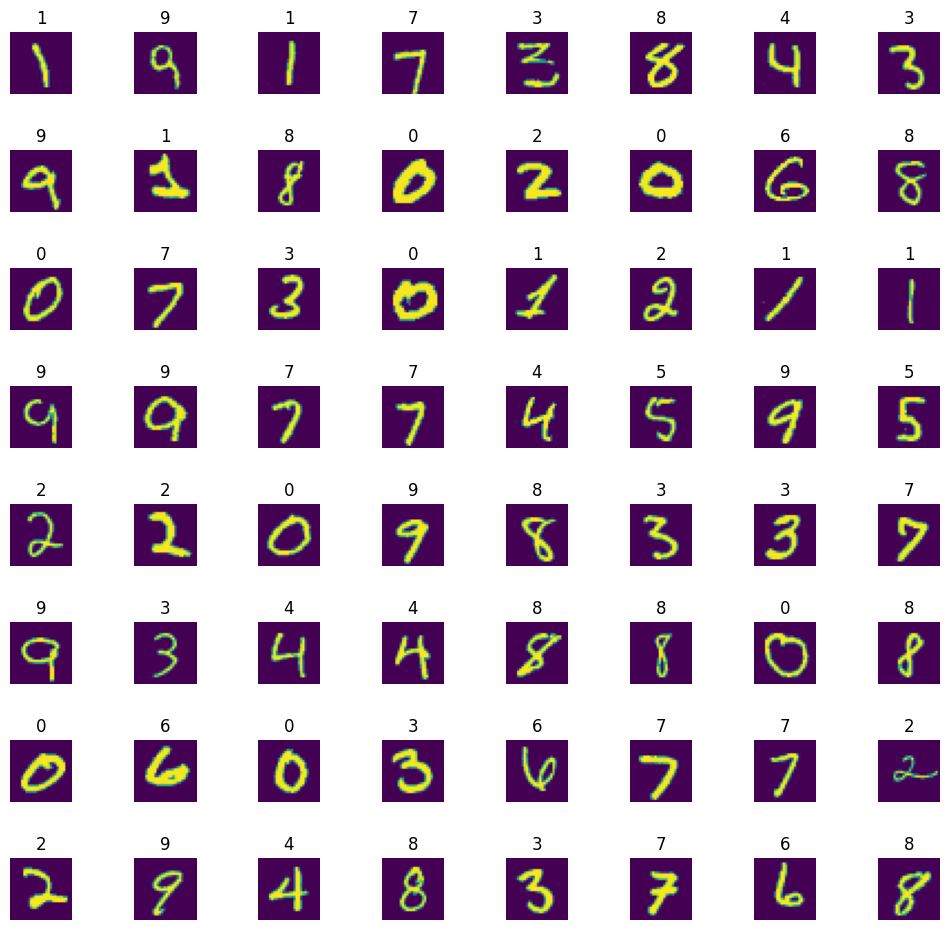

In [ ]:
from sklearn.utils import shuffle

def showImages(num_row, num_col, X, Y):
    import matplotlib.pyplot as plt
    (X_rand, Y_rand) = shuffle(X, Y)
    fig, axes = plt.subplots(num_row, num_col, figsize=(12,12))
    axes = axes.ravel()
    for i in range(0, num_row*num_col):
        axes[i].imshow(X_rand[i])
        axes[i].set_title("{}".format(Y_rand.item(i)))
        axes[i].axis('off')
    plt.subplots_adjust(wspace=1)
    return

num_row = 8
num_col = 8
showImages(num_row, num_col, X=X_train, Y=y_train)


In [ ]:
# Normalize and reshape
X_train = X_train / 255
X_test = X_test / 255
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


In [ ]:
model = Sequential()
# model.add(Flatten(input_shape=(28,28)))
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=5, strides=2, padding='same', activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64, kernel_size=3, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=5, strides=2, padding='same', activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(128, kernel_size=4, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=64)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 113s 145ms/step - accuracy: 0.8403 - loss: 0.5129 - val_accuracy: 0.9836 - val_loss: 0.0570
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 113s 151ms/step - accuracy: 0.9809 - loss: 0.0636 - val_accuracy: 0.9870 - val_loss: 0.0440
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 137s 144ms/step - accuracy: 0.9856 - loss: 0.0479 - val_accuracy: 0.9898 - val_loss: 0.0348
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 142s 144ms/step - accuracy: 0.9875 - loss: 0.0388 - val_accuracy: 0.9912 - val_loss: 0.0310
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 146s 150ms/step - accuracy: 0.9885 - loss: 0.0360 - val_accuracy: 0.9898 - val_loss: 0.0312


In [ ]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9881 - loss: 0.0353
Test accuracy: 0.991599977016449


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


<Axes: >

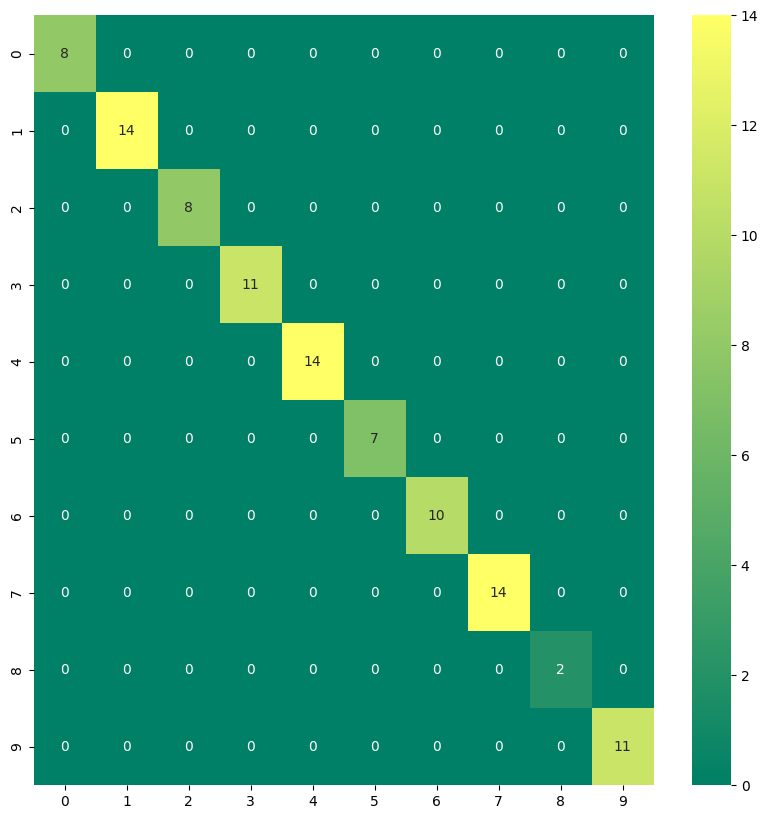

In [ ]:
predictions = model.predict(X_test[1:100])
predictions = np.argmax(predictions, axis=1)

plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test[1:100], predictions)
ax = plt.subplot()
sns.heatmap(cm, annot=True, cmap='summer', fmt='g', ax=ax)


In [ ]:
# Example: change kernel/conv blocks and re-train
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=64)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy with 2 conv layers:', test_acc)


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


750/750 ━━━━━━━━━━━━━━━━━━━━ 67s 88ms/step - accuracy: 0.9058 - loss: 0.3198 - val_accuracy: 0.9822 - val_loss: 0.0670
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 65s 87ms/step - accuracy: 0.9840 - loss: 0.0524 - val_accuracy: 0.9837 - val_loss: 0.0534
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 89ms/step - accuracy: 0.9909 - loss: 0.0315 - val_accuracy: 0.9852 - val_loss: 0.0543
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 67s 89ms/step - accuracy: 0.9937 - loss: 0.0205 - val_accuracy: 0.9839 - val_loss: 0.0624
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 65s 87ms/step - accuracy: 0.9952 - loss: 0.0153 - val_accuracy: 0.9857 - val_loss: 0.0596
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9836 - loss: 0.0556
Test accuracy with 2 conv layers: 0.9871000051498413


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

# Load and preprocess MNIST again
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

# Build CNN with named last conv layer
inputs = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3,3), activation='relu')(inputs)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Conv2D(64, (3,3), activation='relu')(x)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Conv2D(128, (3,3), activation='relu', name='last_conv')(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)
model = Model(inputs, outputs)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - accuracy: 0.8958 - loss: 0.3353 - val_accuracy: 0.9868 - val_loss: 0.0477
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9851 - loss: 0.0487 - val_accuracy: 0.9883 - val_loss: 0.0396
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.9893 - loss: 0.0328 - val_accuracy: 0.9877 - val_loss: 0.0372
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9926 - loss: 0.0241 - val_accuracy: 0.9912 - val_loss: 0.0360
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9940 - loss: 0.0182 - val_accuracy: 0.9930 - val_loss: 0.0287


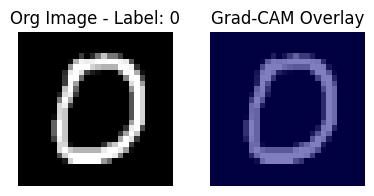

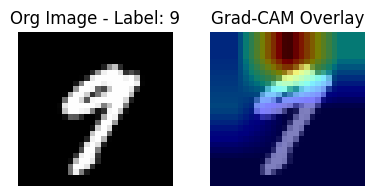

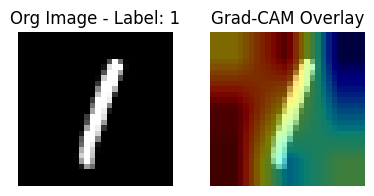

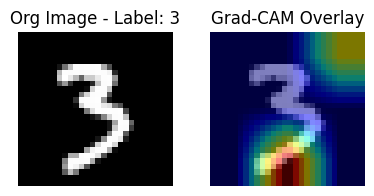

In [ ]:
def compute_gradcam(model, image, label_index, layer_name='last_conv'):
    grad_model = Model(inputs=model.inputs,
                       outputs=[model.get_layer(layer_name).output, model.output])
    with tf.GradientTape() as tape:
        inputs = tf.cast(tf.expand_dims(image, axis=0), tf.float32)
        conv_outputs, predictions = grad_model(inputs)
        loss = predictions[:, label_index]
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Visualize Grad-CAM
image_index = [10, 20, 5, 30]
for i in image_index:
    image = X_test[i]
    label = y_test[i]
    heatmap = compute_gradcam(model, image, label)
    heatmap_resized = tf.image.resize(heatmap[..., tf.newaxis], [28,28]).numpy().squeeze()
    plt.figure(figsize=(4,2))
    plt.subplot(1,2,1)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"Org Image - Label: {label}")
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.imshow(heatmap_resized, cmap='jet', alpha=0.5)
    plt.title("Grad-CAM Overlay")
    plt.axis('off')
    plt.tight_layout()
    plt.show()
